**IMPORTING LIBRARIES**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

**LOADING DATA**

In [ ]:
df=pd.read_csv('/content/Salary Data.csv')

NameError: name 'pd' is not defined

**DATA PREPROCESSING**

In [ ]:
data=df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
data.head(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


In [ ]:
#CHECKING FOR NULL VALUES
data.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
#CHECKING FOR DUPLICATE RECORDS
data.duplicated().sum()

np.int64(49)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


**DATA VISUALIZATION**

In [ ]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

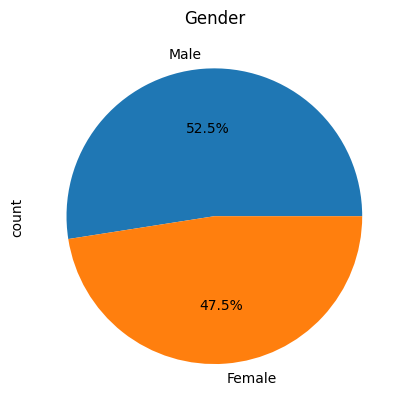

In [ ]:
data['Gender'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title('Gender')
plt.show()

In [ ]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

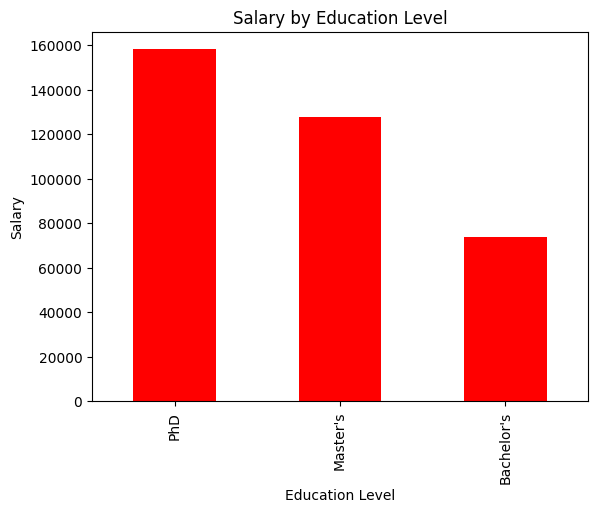

In [ ]:
data.groupby('Education Level')['Salary'].mean().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

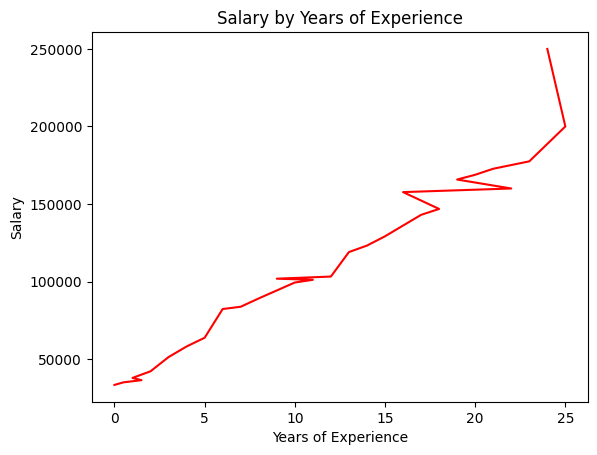

In [ ]:
data.groupby('Years of Experience')['Salary'].mean().sort_values(ascending=False).plot(kind='line',color='red')
plt.title('Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**ENCODING THE CATEGORICAL DATA**

In [ ]:
data_encoded=pd.get_dummies(data,columns=['Gender','Education Level'],drop_first=True)*1
data_encoded.head(3)

,Age,Job Title,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD
0,32.0,Software Engineer,5.0,90000.0,1,0,0
1,28.0,Data Analyst,3.0,65000.0,0,1,0
2,45.0,Senior Manager,15.0,150000.0,1,0,1


In [ ]:
x=data_encoded.drop(columns=['Job Title','Salary'])
y=data_encoded['Salary']
x.head()

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD
0,32.0,5.0,1,0,0
1,28.0,3.0,0,1,0
2,45.0,15.0,1,0,1
3,36.0,7.0,0,0,0
4,52.0,20.0,1,1,0


**SPLITTING THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

**INITIALIZE AND TRAIN THE RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=500,random_state=11)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=11)

**PREDICTING THE SALARY**

In [ ]:
from sklearn.metrics import r2_score
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

0.916493371035505


**ERROR CALCULATION**

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

14648.56350044604


**ACTUAL SALARY VS PREDICTED SALARY**

In [ ]:
d={'Actual Salary':y_test,'Predicted Salary':y_pred,'Error':y_pred - y_test}
predicted_data=pd.DataFrame(d)
predicted_data.head(5)

,Actual Salary,Predicted Salary,Error
226,160000.0,152793.333333,-7206.666667
294,140000.0,132623.000000,-7377.000000
130,160000.0,179060.000000,19060.000000
187,100000.0,95712.500000,-4287.500000
149,175000.0,169605.000000,-5395.000000


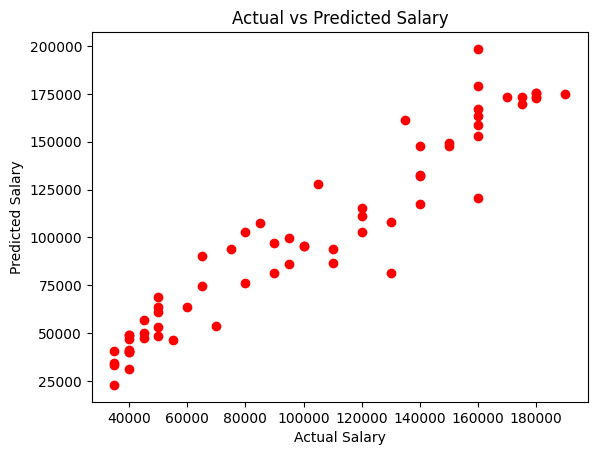

In [ ]:
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [ ]:
import joblib
joblib.dump(rf,'salary_model.pkl')


['salary_model.pkl']